# 第19章 深層学習の実践

## 19.1 深層学習を体験してみよう

Epoch 1/30
12/12 [==============================] - 0s 8ms/step - loss: 2.2185 - accuracy: 0.3062 - val_loss: 2.0586 - val_accuracy: 0.5100
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 1.9240 - accuracy: 0.6237 - val_loss: 1.8364 - val_accuracy: 0.6650
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 1.6921 - accuracy: 0.7250 - val_loss: 1.6246 - val_accuracy: 0.6970
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 1.4766 - accuracy: 0.7585 - val_loss: 1.4344 - val_accuracy: 0.7550
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 1.2875 - accuracy: 0.8025 - val_loss: 1.2707 - val_accuracy: 0.7600
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 1.1295 - accuracy: 0.8147 - val_loss: 1.1429 - val_accuracy: 0.7800
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.9960 - accuracy: 0.8365 - val_loss: 1.0282 - val_accuracy: 0.7950
Epoch 8/30
12/12 [==

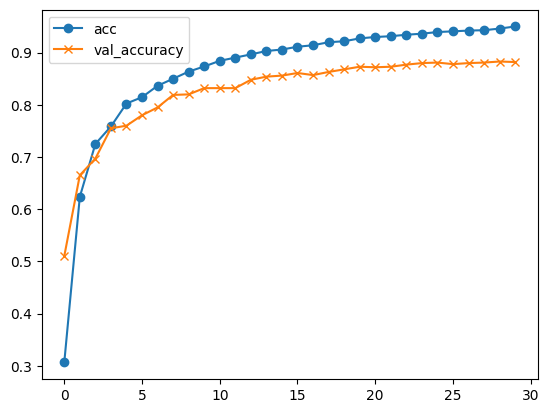

In [41]:
import numpy as np

import matplotlib.pyplot as plt

from keras import optimizers
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

%matplotlib inline

# X_train : トレーニングデータ 特徴点
# y_train : トレーニングデータ 正解ラベル
# X_test  : テストデータ 特徴点
# y_test  : テストデータ 正解ラベル
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test  = X_test.reshape(X_test.shape[0], 784)[:1000]

y_train = to_categorical(y_train)[:6000]
y_test  = to_categorical(y_test)[:1000]


model = Sequential()

model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))

model.add(Dense(128))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=500, epochs=30, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_accuracy', ls='-', marker='x')

plt.legend(loc='best')

plt.show()

## 19.2.8 モデルによる分類

188/188 [==============================] - 0s 917us/step - loss: 1.7561 - accuracy: 0.4152
evaluate loss : 1.1144009828567505 / evaluate acc : 0.6269999742507935


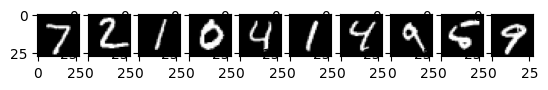

1/1 [==============================] - 0s 21ms/step
[7 0 1 0 4 1 9 5 6 7]


In [43]:
import numpy as np

import matplotlib.pyplot as plt

from keras import optimizers
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

%matplotlib inline

# X_train : トレーニングデータ 特徴点
# y_train : トレーニングデータ 正解ラベル
# X_test  : テストデータ 特徴点
# y_test  : テストデータ 正解ラベル
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test  = X_test.reshape(X_test.shape[0], 784)[:1000]

y_train = to_categorical(y_train)[:6000]
y_test  = to_categorical(y_test)[:1000]


model = Sequential()

model.add(Dense(256, input_dim=784))
model.add(Activation('sigmoid'))

model.add(Dense(512))
model.add(Activation('sigmoid'))

model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)

print("evaluate loss : {0[0]} / evaluate acc : {0[1]}".format(score))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), 'gray')
    
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)

print(pred)